In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [5]:
data = pd.read_csv('./data/tearsheet-data.csv', sep=',', index_col=0, header=0, names=['Date', 'Holdings', 'Cash', 'Total', 'Returns'])

In [6]:
data.index = pd.to_datetime(data.index)
data.head()

,Holdings,Cash,Total,Returns
Date,,,,
1998-01-02,0.0,100000.0,100000.0,NaN
1998-01-02,0.0,100000.0,100000.0,0.0
1998-01-05,0.0,100000.0,100000.0,0.0
1998-01-06,0.0,100000.0,100000.0,0.0
1998-01-07,0.0,100000.0,100000.0,0.0


In [7]:
data['Calculated'] = data['Total'].pct_change()
data.head()

,Holdings,Cash,Total,Returns,Calculated
Date,,,,,
1998-01-02,0.0,100000.0,100000.0,NaN,NaN
1998-01-02,0.0,100000.0,100000.0,0.0,0.0
1998-01-05,0.0,100000.0,100000.0,0.0,0.0
1998-01-06,0.0,100000.0,100000.0,0.0,0.0
1998-01-07,0.0,100000.0,100000.0,0.0,0.0


In [8]:

data['Valited_returns'] = data['Calculated'] == data['Returns']
data.head()

,Holdings,Cash,Total,Returns,Calculated,Valited_returns
Date,,,,,,
1998-01-02,0.0,100000.0,100000.0,NaN,NaN,False
1998-01-02,0.0,100000.0,100000.0,0.0,0.0,True
1998-01-05,0.0,100000.0,100000.0,0.0,0.0,True
1998-01-06,0.0,100000.0,100000.0,0.0,0.0,True
1998-01-07,0.0,100000.0,100000.0,0.0,0.0,True


In [9]:
pd.set_option('display.precision', 20)
data.loc[(~data['Valited_returns'])]

,Holdings,Cash,Total,Returns,Calculated,Valited_returns
Date,,,,,,
1998-01-02,0.00000000000000000000,100000.00000000000000000000,100000.00000000000000000000,NaN,NaN,False
1998-05-29,3327.65985337215852268855,96563.54896957891469355673,99891.20882295108458492905,-0.00108791177048910004,-0.00108791177048916943,False
1998-06-01,3281.30916377187486432376,96563.54896957891469355673,99844.85813335080456454307,-0.00046401169979250000,-0.00046401169979259915,False
1998-06-02,3358.82669637924709604704,96563.54896957891469355673,99922.37566595815587788820,0.00077637981621280004,0.00077637981621259122,False
1998-06-03,3288.90108706847377106897,96563.54896957891469355673,99852.45005664740165229887,-0.00069979930765979995,-0.00069979930765973197,False
...,...,...,...,...,...,...
2008-10-28,49954.85529161711747292429,93635.43639572661777492613,143590.29168734373524785042,0.02799132208157810095,0.02799132208157817381,False
2008-10-29,52274.78722109343652846292,93635.43639572661777492613,145910.22361682006157934666,0.01615660712304830063,0.01615660712304833879,False
2008-10-30,55519.73506802369956858456,93635.43639572661777492613,149155.17146375030279159546,0.02223934530764539938,0.02223934530764548612,False


In [10]:
data['isClose'] = np.isclose(data.Returns, data.Calculated )
print(data.loc[~data.isClose])

            Holdings      Cash     Total  Returns  Calculated  \
Date                                                            
1998-01-02       0.0  100000.0  100000.0      NaN         NaN   

            Valited_returns  isClose  
Date                                  
1998-01-02            False    False  


In [11]:
data.drop(['Calculated', 'isClose', 'Valited_returns'], axis=1, inplace=True)

In [12]:
data['Equity'] = (1 + data['Returns']).cumprod()

In [13]:
pd.set_option('display.precision', 6)
data.loc[data.Equity > 1, ['Cash', 'Total', 'Returns', 'Equity']]


,Cash,Total,Returns,Equity
Date,,,,
1998-06-09,96563.548970,100094.992027,0.001251,1.000950
1998-06-10,96563.548970,100071.017533,-0.000240,1.000710
1998-06-11,96563.548970,100039.850690,-0.000311,1.000399
1998-06-12,96563.548970,100078.609456,0.000387,1.000786
1998-06-15,96563.548970,100001.091923,-0.000775,1.000011
...,...,...,...,...
2008-12-26,149123.897819,149123.897819,0.000000,1.491239
2008-12-29,149123.897819,149123.897819,0.000000,1.491239
2008-12-30,149123.897819,149123.897819,0.000000,1.491239


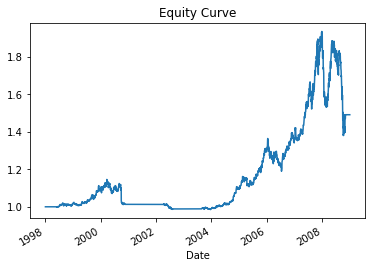

In [14]:
data['Equity'].plot(title='Equity Curve')
plt.show()

**ANUAL RETURNS



In [15]:
data = pd.read_csv('data/tearsheet-data.csv', sep=',', index_col=0, header=0, 
    names=["Date", "Holdings", "Cash", "Total", "Returns"]
)
data.index = pd.to_datetime(data.index)
data['equity'] = (1 + data['Returns']).cumprod()



In [16]:
def aggregated_returns(returns, time_span):
    def calculate_cumulative_returns(x):
        return (1 + x).cumprod()[-1] - 1.0
    
    if time_span == "yearly":
        return returns.groupby(lambda x: x.year).apply(calculate_cumulative_returns)


In [17]:
aggregated_returns(data['Returns'], 'yearly')


Date
1998    0.016809
1999    0.076059
2000   -0.074099
2001    0.000000
2002   -0.024188
2003    0.001224
2004    0.108689
2005    0.180843
2006    0.049970
2007    0.416152
2008   -0.226035
Name: Returns, dtype: float64

In [18]:
def plot_yearly_returns():
    annual_rets = aggregated_returns(data['Returns'], 'yearly') * 100
    annual_rets.plot(kind='bar', color='blue')


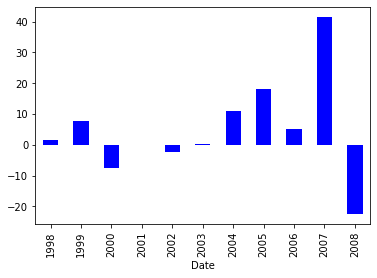

In [19]:
plot_yearly_returns()